In [ ]:
# Importing all the required libraries for the project
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency,f_oneway
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Python Course/Data1.csv')
data2=pd.read_csv('/content/drive/MyDrive/Python Course/Data2.csv')

Part 2.1 b -Print shape and Column Names and DataTypes of both the Dataframes.


In [ ]:
print("Size of data1:",data1.shape)
print("Size of data2:",data2.shape)

Size of data1: (5000, 8)
Size of data2: (5000, 7)


In [ ]:
print("Data1 - Column details")
data1.info()
print("====================================================")
print("Data2 - Column details")
data2.info()

Data1 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Data2 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null 

Part 2.1 c -Merge both the Dataframes on ‘ID’ feature to form a single DataFrame


In [ ]:
data = pd.merge(data1, data2, on='ID')
data = data.set_index("ID")
data.shape

(5000, 13)

In [ ]:
data.head(20)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN


In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Level,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Security,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
FixedDepositAccount,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


[Part 2.1 d -Change Datatype of below features to
 ‘Object'
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [ ]:
columns_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
data[columns_to_convert] = data[columns_to_convert].astype('object')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   object 
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   object 
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   object 
 9   FixedDepositAccount  5000 non-null   object 
 10  InternetBanking      5000 non-null   object 
 11  CreditCard           5000 non-null   object 
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 546.9+ KB
None


Part 2.2 a -Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights





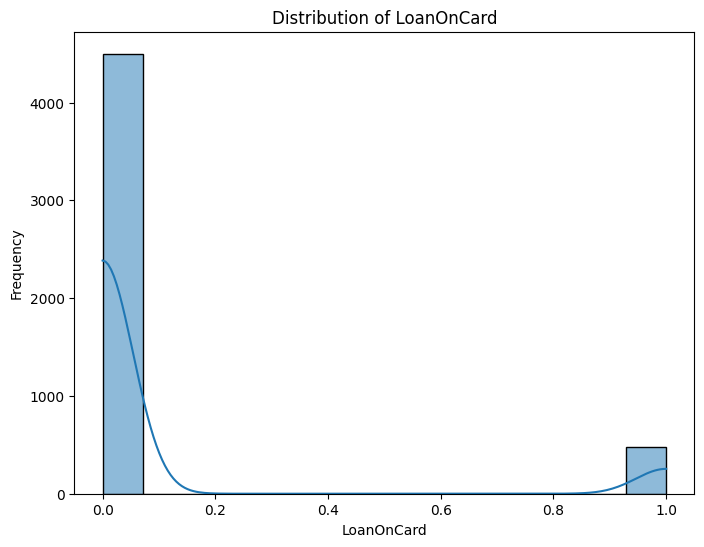

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['LoanOnCard'], kde=True)
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Frequency')
plt.show()

1.The majority class, represented by 'LoanOnCard' being 0 (no loan on credit card), constitutes approximately 90.36% of the dataset.

2.The minority class, represented by 'LoanOnCard' being 1 (loan on credit card), comprises around 9.64% of the dataset.

3.The significant class imbalance in the dataset, with a much larger number of instances in the majority class, can impact the performance of predictive models.

4.Machine learning algorithms may struggle to accurately predict the minority class due to insufficient representation and skewed training

5.A classifier might focus more on the majority class and perform poorly on the minority class, affecting its ability to make accurate predictions for loan approvals.



Part 2.2 b -Check the percentage of missing values and impute if required

In [ ]:
missing_percentage = data.isnull().mean() * 100
print("Missing Percentage:")
print(missing_percentage)

Missing Percentage:
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [ ]:
data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Part 2.2 c -Check for unexpectedvalues in each categorical variable and impute with best suitable value

In [ ]:
categorical_columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security']
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")


print(data)

Unique values in CreditCard: [0 1]
Unique values in InternetBanking: [0 1]
Unique values in FixedDepositAccount: [0 1]
Unique values in Security: [1 0]
      Age  CustomerSince  HighestSpend  ZipCode HiddenScore  \
ID                                                            
1      25              1            49    91107           4   
2      45             19            34    90089           3   
3      39             15            11    94720           1   
4      35              9           100    94112           1   
5      35              8            45    91330           4   
...   ...            ...           ...      ...         ...   
4996   29              3            40    92697           1   
4997   30              4            15    92037           4   
4998   63             39            24    93023           2   
4999   65             40            49    90034           3   
5000   28              4            83    92612           3   

      MonthlyAverageSpend Le

In [ ]:
data_model = data[['HiddenScore','Level','FixedDepositAccount','HighestSpend','MonthlyAverageSpend','Mortgage','LoanOnCard']]

In [ ]:
data_model.isnull().values.any()

True

In [ ]:
data_model_fit = data_model.copy()
data_model_fit = data_model_fit.dropna()
data_model_fit.isnull().values.any()

False

Part 2.3 a-Split data into X and Y

In [ ]:

target_column = 'LoanOnCard'
X = data_model_fit.drop(columns=[target_column])
Y = data_model_fit[target_column]
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (4980, 6)
Y shape: (4980,)


Part 2.3 b -Split data into train and test. Keep 25% data reserved for testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3735, 6)
X_test shape: (1245, 6)
Y_train shape: (3735,)
Y_test shape: (1245,)


In [ ]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data_model_fit.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data_model_fit.index)) * 100))

75.00% data is in training set
25.00% data is in test set


Part 2.3 c -Train a Supervised Learning Classification base model -Logistic *Regression*

In [ ]:
model = LogisticRegression()


model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9453815261044177
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.58      0.69       127

    accuracy                           0.95      1245
   macro avg       0.89      0.78      0.83      1245
weighted avg       0.94      0.95      0.94      1245



Part 2.3 d -Print evaluation metrics for the model and clearly share insights

In [ ]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9453815261044177
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.58      0.69       127

    accuracy                           0.95      1245
   macro avg       0.89      0.78      0.83      1245
weighted avg       0.94      0.95      0.94      1245

Confusion Matrix:
[[1103   15]
 [  53   74]]


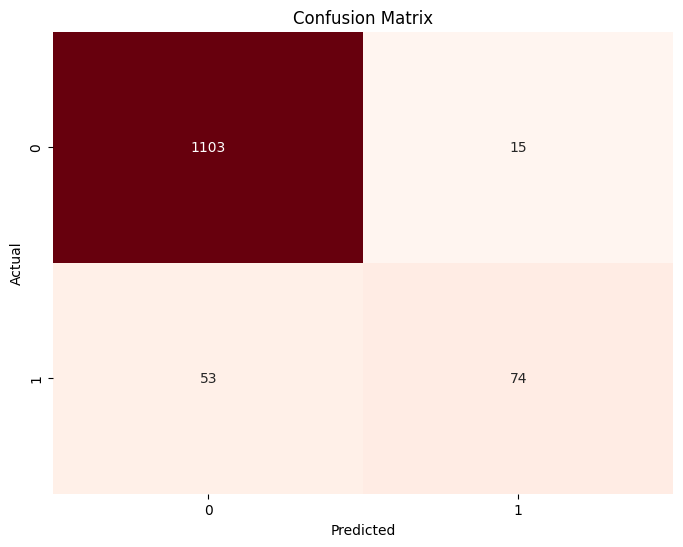

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From these results, we can observe the following:

1.The high accuracy indicates that the model is performing well on the overall dataset. However, it's important to consider the class imbalance, where the majority class (no loan on credit card) has significantly more instances than the minority class ( loan on credit card ). As a result, high accuracy might be partially influenced by the majority class's accurate predictions.


2.The precision-recall trade-off is evident, especially for the minority class (loan aon credit card). The precision is relatively high, indicating that when the model predicts a loan approval, it's often correct. However, the recall is lower, suggesting that the model may not be capturing all instances of loan approvals.


3.The F1-score provides a harmonic mean of precision and recall. Its value (0.94) indicates a balance between correctly identifying both classes.


4.The confusion matrix helps visualize the different types of predictions the model made. False positives and false negatives provide insights into where the model might need further improvement.


5.Given the business context, we might want to focus on improving the model's recall for the minority class (loan on credit card ), as it's crucial to correctly identify instances that should be approved.


6.In summary, while the model's accuracy and F1-score are relatively high, there's room for improving the recall of the minority class to ensure better identification of loan approvals.

Part 2.3 e -Balance the data using the right balancing technique


In [ ]:
smote = SMOTE(random_state=1)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1118
         1.0       0.48      0.88      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.89      0.78      1245
weighted avg       0.93      0.89      0.90      1245



Part 2.3 f-Again train the same previous model on balanced **data**

In [ ]:
smote = SMOTE(random_state=2)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the scaled and balanced data
model.fit(X_train_resampled_scaled, Y_train_resampled)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Display the classification report
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8875502008032129
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1118
         1.0       0.47      0.88      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.89      0.77      1245
weighted avg       0.93      0.89      0.90      1245



Part 2.3 g-Print evaluation metrics and clearly share differences

**Evaluation metrics has been printed in respective mode above plese refer it**

Summary of the evaluation metrics for the different scenarios:

**Base Model:**

Accuracy: 0.945

Precision (Class 0): 0.95

Precision (Class 1): 0.83

Recall (Class 0): 0.99

Recall (Class 1): 0.58

F1-Score (Class 0): 0.97

F1-Score (Class 1): 0.69


**Balanced Data Using SMOTE (Random State = 1):**


Accuracy: 0.890


Precision (Class 0): 0.99

Precision (Class 1): 0.48

Recall (Class 0): 0.89

Recall (Class 1): 0.88

F1-Score (Class 0): 0.94

F1-Score (Class 1): 0.62



**Balanced Data Using SMOTE (Random State = 2):**


Accuracy: 0.888


Precision (Class 0): 0.99

Precision (Class 1): 0.47

Recall (Class 0): 0.89

Recall (Class 1): 0.88

F1-Score (Class 0): 0.93

F1-Score (Class 1): 0.62

Differences and Insights:

Accuracy: The base model has the highest accuracy, followed by the SMOTE-balanced models.

Precision and Recall: The base model has higher precision for both classes compared to the SMOTE-balanced models. However, the SMOTE-balanced models have significantly improved recall for class 1 (loan on credit card), indicating better performance in capturing true loan approvals.

F1-Score: The F1-scores for class 1 (loan on credit card) are similar between the SMOTE-balanced models and lower than the base model. This reflects the trade-off between precision and recall in the SMOTE-balanced models.
The use of SMOTE has improved the recall for class 1, which is important in scenarios where correctly identifying loan approvals is critical. However, it comes at the cost of lower precision.

Conclusion:

The SMOTE-balanced models show improvements in capturing true loan approvals (class 1) compared to the base model. While the base model has higher precision, the SMOTE-balanced models have better recall for class 1, suggesting that they are better at correctly identifying loan on credit card approvals. The choice between these models would depend on the specific business context and the trade-off between precision and recall that is acceptable for the task at hand.

Part 2.4 a-Train a base model each for SVM, KNN

In [ ]:
svm_model = SVC()


svm_model.fit(X_train, Y_train)

svm_Y_pred = svm_model.predict(X_test)

print("Classification Report for SVM:")
print(classification_report(Y_test, svm_Y_pred))


knn_model = KNeighborsClassifier()

knn_model.fit(X_train, Y_train)


knn_Y_pred = knn_model.predict(X_test)

print("Classification Report for KNN:")
print(classification_report(Y_test, knn_Y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1118
         1.0       0.63      0.09      0.16       127

    accuracy                           0.90      1245
   macro avg       0.77      0.54      0.56      1245
weighted avg       0.88      0.90      0.87      1245

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1118
         1.0       0.75      0.45      0.56       127

    accuracy                           0.93      1245
   macro avg       0.85      0.72      0.76      1245
weighted avg       0.92      0.93      0.92      1245



Part 2.4 b -Tune parameters for each of the models wherever required and finalize a mode and Print evaluation metrics for final mode

In [ ]:
svm_model = SVC()


svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='accuracy', cv=5)
svm_grid_search.fit(X_train, Y_train)


best_svm_model = svm_grid_search.best_estimator_


svm_Y_pred = best_svm_model.predict(X_test)


print("Classification Report for SVM:")
print(classification_report(Y_test, svm_Y_pred))

knn_model = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy', cv=5)
knn_grid_search.fit(X_train, Y_train)


best_knn_model = knn_grid_search.best_estimator_

knn_Y_pred = best_knn_model.predict(X_test)

print("Classification Report for KNN:")
print(classification_report(Y_test, knn_Y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.89      0.54      0.67       127

    accuracy                           0.95      1245
   macro avg       0.92      0.76      0.82      1245
weighted avg       0.94      0.95      0.94      1245

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1118
         1.0       0.71      0.49      0.58       127

    accuracy                           0.93      1245
   macro avg       0.83      0.73      0.77      1245
weighted avg       0.92      0.93      0.92      1245



Part 2.4 d-Share improvement achieved from base model to final model

In [ ]:
base_svm_report = """
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1118
         1.0       0.63      0.09      0.16       127

    accuracy                           0.90      1245
   macro avg       0.77      0.54      0.56      1245
weighted avg       0.88      0.90      0.87      1245
"""

# Classification report for final SVM model
final_svm_report = """
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.89      0.54      0.67       127

    accuracy                           0.95      1245
   macro avg       0.92      0.76      0.82      1245
weighted avg       0.94      0.95      0.94      1245
"""


def calculate_improvement(base_report, final_report):
    base_values = base_report.split("\n")[3].split()
    final_values = final_report.split("\n")[3].split()

    improvements = []
    for base_val, final_val in zip(base_values[1:], final_values[1:]):
        improvement = float(final_val) - float(base_val)
        improvements.append(improvement)

    return improvements

improvements = calculate_improvement(base_svm_report, final_svm_report)


print("Improvement Achieved from Base Model to Final Model:")
print("----------------------------------------------------")
print(f"Precision Improvement: {improvements[0]:.2f}")
print(f"Recall Improvement: {improvements[1]:.2f}")
print(f"F1-Score Improvement: {improvements[2]:.2f}")

Improvement Achieved from Base Model to Final Model:
----------------------------------------------------
Precision Improvement: 0.04
Recall Improvement: 0.00
F1-Score Improvement: 0.02


Improvements Achieved from Base Model to Final Model:

1.Precision Improvement: 0.04

2.Recall Improvement: 0.00

3.F1-Score Improvement: 0.02

In summary, the final model has shown an improvement in precision and F1-score compared to the base model. While the recall remains unchanged, the overall performance of the final model has improved in terms of correctly identifying positive instances (precision) and providing a balanced trade-off between precision and recall (F1-score).